# Running the final wake model

In [1]:
input_dir = "C:\\dev\\play\\brainwave-data"


In [ ]:
from sleep_events import load_days_data

day_data = load_days_data(True)

In [2]:
from sleep_events import load_days_data

day_data = load_days_data(True)

In [3]:
# import stitch_pipeline_results
# from importlib import reload
# reload(stitch_pipeline_results)
#
# df = stitch_pipeline_results.stitch_all_days(input_dir)

In [4]:
import stitch_pipeline_results
from importlib import reload
reload(stitch_pipeline_results)

df = stitch_pipeline_results.stitch_all_days_optimised(input_dir)

  0%|          | 0/148 [00:00<?, ?it/s]

C:\dev\play\brainwave-processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (590) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
C:\dev\play\brainwave-processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (590) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
C:\dev\play\brainwave-processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (591) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
C:\dev\play\brainwave-processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (591) have mixed types. Specify dtype option on import or set low_memory=False.
  post_human_df = pd.read_csv(post_human_file)
C:\dev\play\brainwave-processor\stitch_pipeline_results.py:189: DtypeWarning: Columns (591) have mixed types. Specify dtype option on import or set 

In [5]:
# import stitch_pipeline_results
# from importlib import reload
# reload(stitch_pipeline_results)
#
# # df1 = stitch_pipeline_results.stitch_day_optimised(input_dir, '2024-12-10-21-14-13')
# df1 = stitch_pipeline_results.stitch_day_optimised(input_dir, '2024-07-22-22-24-06')
# df1.iloc[-1][['Timestamp']]

In [6]:
# df[['dayAndNightOf']]

In [7]:
# df['dayAndNightOf'] = pd.to_datetime(df['dayAndNightOf'])

In [8]:
# df[['Timestamp']]

In [9]:
import pandas as pd

# Group by 'dayAndNightOf' and calculate the sum of 'minsUntilWakePredictionError'
grouped_df = df.groupby('dayAndNightOf').agg(
    minsUntilWakeMeanPredictionError=('minsUntilWakePredictionError', lambda x: x.abs().mean()),
    minsUntilWakePredictionInitial=('minsUntilWakePrediction', lambda x: pd.to_timedelta(x.head(10).mean(), unit='m')),
    TempCount=('Temp', 'count'),
    HRCount=('HR', 'count'),
    FirstEpochTimestampUK = ('Timestamp', lambda x: x.iloc[0]),
).reset_index()

# grouped_df['dayAndNightOf'] = pd.to_datetime(grouped_df['dayAndNightOf'])
# grouped_df['FirstEpochTimestampUK'] = pd.to_datetime(grouped_df['FirstEpochTimestampUK'])

grouped_df = grouped_df[grouped_df['FirstEpochTimestampUK'].notna()]

grouped_df

,dayAndNightOf,minsUntilWakeMeanPredictionError,minsUntilWakePredictionInitial,TempCount,HRCount,FirstEpochTimestampUK
0,2024-07-11,NaN,NaT,0,0,2024-07-11 22:46:18.463109016+01:00
1,2024-07-12,NaN,NaT,0,0,2024-07-12 22:38:58.448576927+01:00
2,2024-07-15,36.388327,0 days 08:18:55.721220,273,877,2024-07-15 22:33:29.966742039+01:00
3,2024-07-16,31.067622,0 days 08:47:00.576420,235,983,2024-07-16 23:14:52.149835110+01:00
4,2024-07-17,31.302199,0 days 09:11:43.170900,135,943,2024-07-17 22:48:49.467215061+01:00
...,...,...,...,...,...,...
89,2025-01-23,NaN,NaT,263,267,2025-01-23 21:33:32.807487011+00:00
90,2025-01-27,NaN,NaT,666,536,2025-01-27 21:31:51.296858072+00:00
91,2025-01-28,NaN,NaT,1072,891,2025-01-28 21:50:36.081846952+00:00
92,2025-01-30,NaN,NaT,1222,1059,2025-01-30 21:49:17.621808052+00:00


In [10]:
grouped_df

,dayAndNightOf,minsUntilWakeMeanPredictionError,minsUntilWakePredictionInitial,TempCount,HRCount,FirstEpochTimestampUK
0,2024-07-11,NaN,NaT,0,0,2024-07-11 22:46:18.463109016+01:00
1,2024-07-12,NaN,NaT,0,0,2024-07-12 22:38:58.448576927+01:00
2,2024-07-15,36.388327,0 days 08:18:55.721220,273,877,2024-07-15 22:33:29.966742039+01:00
3,2024-07-16,31.067622,0 days 08:47:00.576420,235,983,2024-07-16 23:14:52.149835110+01:00
4,2024-07-17,31.302199,0 days 09:11:43.170900,135,943,2024-07-17 22:48:49.467215061+01:00
...,...,...,...,...,...,...
89,2025-01-23,NaN,NaT,263,267,2025-01-23 21:33:32.807487011+00:00
90,2025-01-27,NaN,NaT,666,536,2025-01-27 21:31:51.296858072+00:00
91,2025-01-28,NaN,NaT,1072,891,2025-01-28 21:50:36.081846952+00:00
92,2025-01-30,NaN,NaT,1222,1059,2025-01-30 21:49:17.621808052+00:00


In [11]:
df1

NameError: name 'df1' is not defined

In [12]:
import sleep_events
reload(sleep_events)
from sleep_events import convert_timestamps_to_uk_optimised

dd = day_data.copy()
dd = dd[dd['dayAndNightOf'] == '2024-07-22']
dd['wt'] = pd.to_timedelta(dd['night:yasa:adjusted:wakeTimeSSM'], unit='s')
display(dd[['wt']])
dd['wt2'] = (dd['dayAndNightOf'] + pd.to_timedelta(dd['night:yasa:adjusted:wakeTimeSSM'], unit='s'))
display(dd[['wt2']])
display(dd['wt2'].dtype)
dd['wt3'] = convert_timestamps_to_uk_optimised(dd['dayAndNightOf'] + pd.to_timedelta(dd['night:yasa:adjusted:wakeTimeSSM'], unit='s'))
display(dd[['wt3']])

,wt
92,1 days 06:32:00


,wt2
92,2024-07-23 06:32:00


dtype('<M8[ns]')

,wt3
92,2024-07-23 06:32:00+01:00


In [26]:
import sleep_events
reload(sleep_events)
from sleep_events import convert_timestamps_to_uk_optimised

# Ensure 'dayAndNightOf' column in both DataFrames is of string type
# grouped_df['dayAndNightOf'] = grouped_df['dayAndNightOf'].astype(str)
# day_data['dayAndNightOf'] = day_data['dayAndNightOf'].astype(str)

# Merge the DataFrames on 'dayAndNightOf'
merged = grouped_df.merge(day_data, on='dayAndNightOf')
# merged['dayAndNightOf'] = pd.to_datetime(merged['dayAndNightOf'])

merged['wakeTime'] = convert_timestamps_to_uk_optimised(merged['dayAndNightOf'] + pd.to_timedelta(merged['night:yasa:adjusted:wakeTimeSSM'], unit='s'))
merged['wakeTimeOnly'] = merged['wakeTime'].dt.time
merged['asleepTime'] = convert_timestamps_to_uk_optimised(merged['dayAndNightOf'] + pd.to_timedelta(merged['night:yasa:adjusted:asleepTimeSSM'], unit='s'))
merged['asleepTimeOnly'] = merged['asleepTime'].dt.time

useful = merged[merged['asleepTime'].notna()]


#
# # merged['asleepTime'] = pd.to_timedelta(merged['night:yasa:adjusted:asleepTimeSSM'], unit='s').dt
# # merged['asleepTimeMinsTD'] = pd.to_timedelta(merged['asleepTimeMins'], unit='m', errors='coerce').fillna(pd.Timedelta(seconds=0))
#
useful['wakeTimePredictionFromInitial'] = useful['FirstEpochTimestampUK'] + useful['minsUntilWakePredictionInitial']
useful['wakeTimePredictionFromInitialOnly'] = useful['wakeTimePredictionFromInitial'].dt.time
useful['wakeTimePredictionFromInitialSSM'] = useful['wakeTimePredictionFromInitial'].dt.hour * 3600 + useful['wakeTimePredictionFromInitial'].dt.minute * 60 + useful['wakeTimePredictionFromInitial'].dt.second
useful['wakeTimePredictionFromInitialError'] = (useful['wakeTimePredictionFromInitial'] - useful['wakeTime']).abs()
useful['wakeTimePredictionFromInitialErrorMins'] = (useful['wakeTimePredictionFromInitial'] - useful['wakeTime']).dt.total_seconds() / 60
useful['wakeTimePredictionFromInitialErrorMinsAbs'] = (useful['wakeTimePredictionFromInitialErrorMins'].abs())
useful = useful[useful['wakeTimePredictionFromInitial'].notna()]

#
# # merged['wakeTimeMinsStr'] = merged['wakeTimeMins'].apply(lambda x: f"{int((x // 60) - 24)}:{int(x % 60):02d}" if pd.notna(x) else "NaN")
# # merged['asleepTimeMinsStr'] = merged['asleepTimeMins'].apply(lambda x: f"{int((x // 60))}:{int(x % 60):02d}" if pd.notna(x) else "NaN")
# # merged['wakeTimePredictionFromInitialStr'] = merged['wakeTimePredictionFromInitial'].apply(lambda x: str(x))
#

useful[['FirstEpochTimestampUK', 'minsUntilWakePredictionInitial', 'wakeTimeOnly', 'wakeTimePredictionFromInitialOnly', 'wakeTimePredictionFromInitialErrorMinsAbs']]



C:\Users\graha\AppData\Local\Temp\ipykernel_27508\2673949675.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful['wakeTimePredictionFromInitial'] = useful['FirstEpochTimestampUK'] + useful['minsUntilWakePredictionInitial']
C:\Users\graha\AppData\Local\Temp\ipykernel_27508\2673949675.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful['wakeTimePredictionFromInitialOnly'] = useful['wakeTimePredictionFromInitial'].dt.time
C:\Users\graha\AppData\Local\Temp\ipykernel_27508\2673949675.py:27: Setti

,FirstEpochTimestampUK,minsUntilWakePredictionInitial,wakeTimeOnly,wakeTimePredictionFromInitialOnly,wakeTimePredictionFromInitialErrorMinsAbs
9,2024-07-22 22:24:06.685492039+01:00,0 days 09:06:50.520240,06:32:00,07:30:57.205732,58.953429
12,2024-07-27 22:16:21.778007030+01:00,0 days 09:52:33.445499999,07:41:00,08:08:55.223507,27.920392
13,2024-08-18 21:33:07.498430967+01:00,0 days 09:07:39.252900,06:12:00,06:40:46.751330,28.779189
14,2024-08-19 21:43:57.085977077+01:00,0 days 08:57:11.255820,05:46:00,06:41:08.341797,55.139030
15,2024-08-20 21:17:32.914783955+01:00,0 days 10:01:24.315840,06:04:00,07:18:57.230623,74.953844
...,...,...,...,...,...
83,2024-12-07 21:19:09.720104933+00:00,0 days 09:17:45.175140,07:04:10,06:36:54.895244,27.251746
84,2024-12-08 21:23:50.694653988+00:00,0 days 09:17:46.829220,06:45:51,06:41:37.523873,4.224602
85,2024-12-09 21:29:08.310563087+00:00,0 days 10:16:53.206440,07:27:08,07:46:01.517003,18.891950
86,2024-12-10 21:14:13.630418062+00:00,0 days 09:43:41.436840,06:37:44,06:57:55.067258,20.184454


In [14]:
useful['wakeTimePredictionFromInitialError'].describe()

count                           61
mean     0 days 00:39:59.343644473
std      0 days 00:25:21.076119609
min      0 days 00:00:14.580751980
25%      0 days 00:20:53.908110940
50%      0 days 00:39:45.451998004
75%      0 days 00:50:51.195698074
max         0 days 01:51:56.543160
Name: wakeTimePredictionFromInitialError, dtype: object

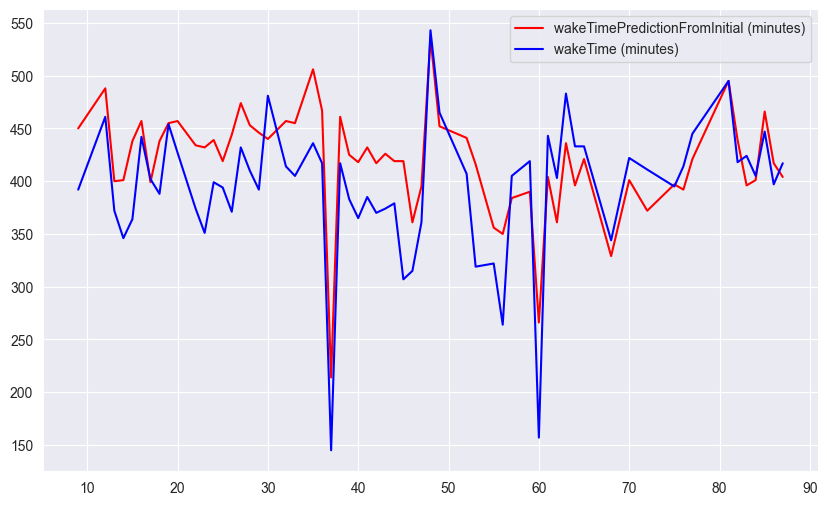

In [15]:
import matplotlib.pyplot as plt

u = useful['wakeTimePredictionFromInitial'].dt.hour * 60 + useful['wakeTimePredictionFromInitial'].dt.minute
u2 = useful['wakeTime'].dt.hour * 60 + useful['wakeTime'].dt.minute

# Plot the wakeTimePredictionFromInitialError in minutes
plt.figure(figsize=(10, 6))
plt.plot(u, label='wakeTimePredictionFromInitial (minutes)', color='red')
plt.plot(u2, label='wakeTime (minutes)', color='blue')
plt.legend()
plt.show()

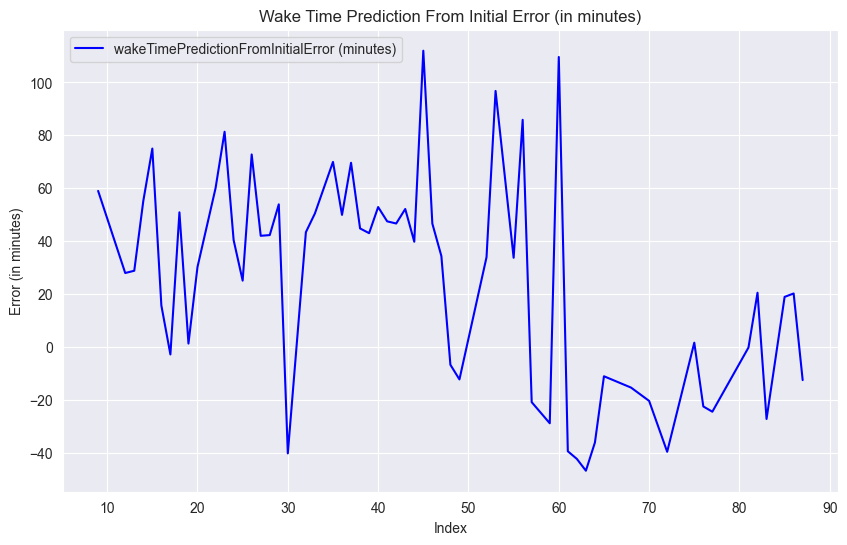

In [16]:
import matplotlib.pyplot as plt

# Plot the wakeTimePredictionFromInitialError in minutes
plt.figure(figsize=(10, 6))
plt.plot(useful['wakeTimePredictionFromInitialErrorMins'], label='wakeTimePredictionFromInitialError (minutes)', color='blue')

# Set the title and labels
plt.title('Wake Time Prediction From Initial Error (in minutes)')
plt.xlabel('Index')
plt.ylabel('Error (in minutes)')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [17]:
wake_early = useful[useful['night:yasa:adjusted:wakeTimeSSM'] < 30 * 3600]
wake_early[['dayAndNightOf', 'asleepTime', 'wakeTime', 'wakeTimePredictionFromInitial',  'wakeTimePredictionFromInitialErrorMins']]

,dayAndNightOf,asleepTime,wakeTime,wakeTimePredictionFromInitial,wakeTimePredictionFromInitialErrorMins
14,2024-08-19,2024-08-19 22:50:27+01:00,2024-08-20 05:46:00+01:00,2024-08-20 06:41:08.341797077+01:00,55.139030
23,2024-09-02,2024-09-02 22:30:00+01:00,2024-09-03 05:51:00+01:00,2024-09-03 07:12:18.584847107+01:00,81.309747
37,2024-09-26,2024-09-26 22:38:32+01:00,2024-09-27 02:25:02+01:00,2024-09-27 03:34:37.069855026+01:00,69.584498
45,2024-10-07,2024-10-07 22:34:30+01:00,2024-10-08 05:07:47+01:00,2024-10-08 06:59:43.543160+01:00,111.942386
46,2024-10-08,2024-10-08 22:44:36+01:00,2024-10-09 05:15:00+01:00,2024-10-09 06:01:36.421083046+01:00,46.607018
53,2024-10-24,2024-10-24 23:08:41+01:00,2024-10-25 05:19:41+01:00,2024-10-25 06:56:25.558434022+01:00,96.742641
55,2024-10-30,2024-10-30 22:31:26+00:00,2024-10-31 05:22:30+00:00,2024-10-31 05:56:11.144339959+00:00,33.685739
56,2024-11-01,2024-11-01 22:31:23+00:00,2024-11-02 04:24:53+00:00,2024-11-02 05:50:42.792708044+00:00,85.829878
60,2024-11-05,2024-11-05 23:11:30+00:00,2024-11-06 02:37:00+00:00,2024-11-06 04:26:34.436478966+00:00,109.573941
68,2024-11-21,2024-11-21 23:30:26+00:00,2024-11-22 05:44:30+00:00,2024-11-22 05:29:06.428042113+00:00,-15.392866


In [18]:
predicted_early_wake = useful[useful['wakeTimePredictionFromInitial'].dt.hour < 6]
predicted_early_wake[['dayAndNightOf', 'asleepTime', 'wakeTime', 'wakeTimePredictionFromInitial',  'wakeTimePredictionFromInitialErrorMins']]

,dayAndNightOf,asleepTime,wakeTime,wakeTimePredictionFromInitial,wakeTimePredictionFromInitialErrorMins
37,2024-09-26,2024-09-26 22:38:32+01:00,2024-09-27 02:25:02+01:00,2024-09-27 03:34:37.069855026+01:00,69.584498
55,2024-10-30,2024-10-30 22:31:26+00:00,2024-10-31 05:22:30+00:00,2024-10-31 05:56:11.144339959+00:00,33.685739
56,2024-11-01,2024-11-01 22:31:23+00:00,2024-11-02 04:24:53+00:00,2024-11-02 05:50:42.792708044+00:00,85.829878
60,2024-11-05,2024-11-05 23:11:30+00:00,2024-11-06 02:37:00+00:00,2024-11-06 04:26:34.436478966+00:00,109.573941
68,2024-11-21,2024-11-21 23:30:26+00:00,2024-11-22 05:44:30+00:00,2024-11-22 05:29:06.428042113+00:00,-15.392866


In [19]:
actually_early_wake = useful[useful['wakeTime'].dt.hour < 6]
actually_early_wake[['dayAndNightOf', 'asleepTime', 'wakeTime', 'wakeTimePredictionFromInitial',  'wakeTimePredictionFromInitialErrorMins']]

,dayAndNightOf,asleepTime,wakeTime,wakeTimePredictionFromInitial,wakeTimePredictionFromInitialErrorMins
14,2024-08-19,2024-08-19 22:50:27+01:00,2024-08-20 05:46:00+01:00,2024-08-20 06:41:08.341797077+01:00,55.139030
23,2024-09-02,2024-09-02 22:30:00+01:00,2024-09-03 05:51:00+01:00,2024-09-03 07:12:18.584847107+01:00,81.309747
37,2024-09-26,2024-09-26 22:38:32+01:00,2024-09-27 02:25:02+01:00,2024-09-27 03:34:37.069855026+01:00,69.584498
45,2024-10-07,2024-10-07 22:34:30+01:00,2024-10-08 05:07:47+01:00,2024-10-08 06:59:43.543160+01:00,111.942386
46,2024-10-08,2024-10-08 22:44:36+01:00,2024-10-09 05:15:00+01:00,2024-10-09 06:01:36.421083046+01:00,46.607018
53,2024-10-24,2024-10-24 23:08:41+01:00,2024-10-25 05:19:41+01:00,2024-10-25 06:56:25.558434022+01:00,96.742641
55,2024-10-30,2024-10-30 22:31:26+00:00,2024-10-31 05:22:30+00:00,2024-10-31 05:56:11.144339959+00:00,33.685739
56,2024-11-01,2024-11-01 22:31:23+00:00,2024-11-02 04:24:53+00:00,2024-11-02 05:50:42.792708044+00:00,85.829878
60,2024-11-05,2024-11-05 23:11:30+00:00,2024-11-06 02:37:00+00:00,2024-11-06 04:26:34.436478966+00:00,109.573941
68,2024-11-21,2024-11-21 23:30:26+00:00,2024-11-22 05:44:30+00:00,2024-11-22 05:29:06.428042113+00:00,-15.392866


In [20]:
predicted_late_wake = useful[useful['wakeTimePredictionFromInitial'].dt.hour > 7]
predicted_late_wake[['dayAndNightOf', 'asleepTime', 'wakeTime', 'wakeTimePredictionFromInitial',  'wakeTimePredictionFromInitialErrorMins']]

,dayAndNightOf,asleepTime,wakeTime,wakeTimePredictionFromInitial,wakeTimePredictionFromInitialErrorMins
12,2024-07-27,2024-07-28 00:09:00+01:00,2024-07-28 07:41:00+01:00,2024-07-28 08:08:55.223507029+01:00,27.920392
35,2024-09-24,2024-09-24 23:02:30+01:00,2024-09-25 07:16:14+01:00,2024-09-25 08:26:09.063140107+01:00,69.917719
48,2024-10-11,2024-10-11 22:37:59+01:00,2024-10-12 09:03:00+01:00,2024-10-12 08:56:13.753224954+01:00,-6.770780
81,2024-12-05,2024-12-05 22:56:55+00:00,2024-12-06 08:15:25+00:00,2024-12-06 08:15:10.419248020+00:00,-0.243013


In [21]:
actually_late_wake = useful[useful['wakeTime'].dt.hour > 7]
actually_late_wake[['dayAndNightOf', 'asleepTime', 'wakeTime', 'wakeTimePredictionFromInitial',  'wakeTimePredictionFromInitialErrorMins']]

,dayAndNightOf,asleepTime,wakeTime,wakeTimePredictionFromInitial,wakeTimePredictionFromInitialErrorMins
30,2024-09-15,2024-09-15 22:25:36+01:00,2024-09-16 08:01:06+01:00,2024-09-16 07:20:50.493323059+01:00,-40.258445
48,2024-10-11,2024-10-11 22:37:59+01:00,2024-10-12 09:03:00+01:00,2024-10-12 08:56:13.753224954+01:00,-6.770780
63,2024-11-09,2024-11-09 23:27:00+00:00,2024-11-10 08:03:00+00:00,2024-11-10 07:16:11.297576042+00:00,-46.811707
81,2024-12-05,2024-12-05 22:56:55+00:00,2024-12-06 08:15:25+00:00,2024-12-06 08:15:10.419248020+00:00,-0.243013


In [22]:
useful[['dayAndNightOf', 'night:yasa:adjusted:wakeTimeSSM', 'wakeTime']]

,dayAndNightOf,night:yasa:adjusted:wakeTimeSSM,wakeTime
9,2024-07-22,109920.0,2024-07-23 06:32:00+01:00
12,2024-07-27,114060.0,2024-07-28 07:41:00+01:00
13,2024-08-18,108720.0,2024-08-19 06:12:00+01:00
14,2024-08-19,107160.0,2024-08-20 05:46:00+01:00
15,2024-08-20,108240.0,2024-08-21 06:04:00+01:00
...,...,...,...
83,2024-12-07,111850.0,2024-12-08 07:04:10+00:00
84,2024-12-08,110751.0,2024-12-09 06:45:51+00:00
85,2024-12-09,113228.0,2024-12-10 07:27:08+00:00
86,2024-12-10,110264.0,2024-12-11 06:37:44+00:00


In [29]:
import pandas as pd

# Ensure 'dayAndNightOf' is not included in numerical operations
numerical_columns = useful.select_dtypes(include=['number']).columns

# Calculate the correlation matrix only for numerical columns
correlation_matrix = useful[numerical_columns].corr()

# Extract the correlation of all features with wakeTimePredictionFromInitialSSM
correlation_with_wakeTimePredictionFromInitialSSM = correlation_matrix['wakeTimePredictionFromInitialSSM']

# Convert the Series to a DataFrame
correlation_df = correlation_with_wakeTimePredictionFromInitialSSM.to_frame().reset_index()

# Rename the columns for clarity
correlation_df.columns = ['Feature', 'CorrelationWithWakeTimePredictionFromInitialSSM']

# Display the DataFrame
correlation_df

,Feature,CorrelationWithWakeTimePredictionFromInitialSSM
0,minsUntilWakeMeanPredictionError,-0.192009
1,minsUntilWakePredictionInitial,0.935886
2,TempCount,0.346002
3,HRCount,-0.092538
4,phoneUsage:allDay:categories:Work:totalDuratio...,-0.027322
...,...,...
2689,drugsAndSupplements:MagnesiumThreonateLastSSM,NaN
2690,wakeTimePredictionFromInitialSSM,1.000000
2691,wakeTimePredictionFromInitialError,-0.234567
2692,wakeTimePredictionFromInitialErrorMins,-0.020083


In [27]:
useful[['wakeTimePredictionFromInitialSSM']]

,wakeTimePredictionFromInitialSSM
9,27057.0
12,29335.0
13,24046.0
14,24068.0
15,26337.0
...,...
83,23814.0
84,24097.0
85,27961.0
86,25075.0


In [23]:
day = '2024-11-21'
day_df = df[df['dayAndNightOf'] == day]
day_data_for_day_df = merged[merged['dayAndNightOf'] == day]

# day_df['wakeTimeMins'] = day_data_for_day_df['night:yasa:adjusted:wakeTimeSSM'] / 60
# merged['asleepTimeMins'] = day_data_for_day_df['night:yasa:adjusted:asleepTimeSSM'] / 60
# merged['wakeTimePredictionFromInitial'] = merged['minsUntilWakePredictionInitial'] + merged['asleepTimeMins']
# merged['wakeTimePredictionFromInitialError'] = merged['wakeTimePredictionFromInitial'] - merged['wakeTimeMins']

# day_df['wakeTimePredictionFromNow'] =  day_df['TimestampUK_x'] + pd.to_timedelta(day_df['minsUntilWakePrediction'], unit='m')
day_df['wakeTimePredictionFromNow'] = pd.to_datetime(day_df['TimestampUK_x']) + pd.to_timedelta(day_df['minsUntilWakePrediction'], unit='m')
day_df['wakeTimePredictionFromNowMins'] = day_df['wakeTimePredictionFromNow'].dt.hour * 60 + day_df['wakeTimePredictionFromNow'].dt.minute
day_df['wakeTimePredictionFromNowStr'] = day_df['wakeTimePredictionFromNowMins'].apply(lambda x: f"{int((x // 60))}:{int(x % 60):02d}" if pd.notna(x) else "NaN")



KeyError: 'TimestampUK_x'

In [ ]:
[col for col in day_df.columns if "timestamp" in col.lower()]

In [ ]:
day_df

In [ ]:
day_df[['TimestampUK_x', 'minsUntilWake', 'minsUntilWakePrediction', 'wakeTimePredictionFromNowStr']]

In [ ]:
import matplotlib.pyplot as plt

# Calculate the rolling average of the minsUntilWake column with a window size of 10
rolling_average = day_df['minsUntilWakePrediction'].rolling(window=10).mean()

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the minsUntilWake on the first axis
ax1.plot(day_df['minsUntilWake'], label='minsUntilWake real', alpha=0.5)
ax1.plot(rolling_average, label='Rolling Average (window=10)', color='red')
ax1.set_xlabel('Index')
ax1.set_ylabel('minsUntilWake')
ax1.legend(loc='upper left')

# Create the second axis
ax2 = ax1.twinx()

# Plot the Temp on the second axis
ax2.plot(day_df['Temp'], alpha=0.5, color='blue', label='Temp')
ax2.set_ylabel('Temp')
ax2.legend(loc='upper right')

# Set the title
plt.title('Plot of minsUntilWake with Rolling Average and Temp')

# Show the plot
plt.show()

In [1]:
useful

NameError: name 'useful' is not defined